In [1]:

import os
import sys
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from itertools import product
from sklearn.preprocessing import RobustScaler, LabelEncoder

sys.path.extend([
                '../src',
                '../data',
                ])

from utils import run_nested_cv_3b

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("CPU")
    
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

#data
left = pd.read_csv('../data/left.csv')
right = pd.read_csv('../data/right.csv')
affected = pd.read_csv('../data/affected.csv')
unaffected = pd.read_csv('../data/unaffected.csv')

#limb
right['limb'] = 1
left['limb'] = 2
affected['limb'] = 3
unaffected['limb'] = 4

affected['subject'] = affected['subject'] + 10
unaffected['subject'] = unaffected['subject'] + 10

le = LabelEncoder()
right['use_type_encoded'] = le.fit_transform(right['use_type'])
left['use_type_encoded'] = le.fit_transform(left['use_type'])
affected['use_type_encoded'] = le.fit_transform(affected['use_type'])
unaffected['use_type_encoded'] = le.fit_transform(unaffected['use_type'])

combined = pd.concat([unaffected, 
                      affected, 
                      right, 
                      left], 
                      ignore_index=True)

architecture = {
                'num_filters': [50, 25],
                'filter_sizes': [5, 5],
                'pool_sizes': [5, 5]
               }

CPU


2025-07-10 09:58:21.227700: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x111a4dc40>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x111a4dca0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x17b47c550>, 'optimizer': 'nadam'} with score: 0.200


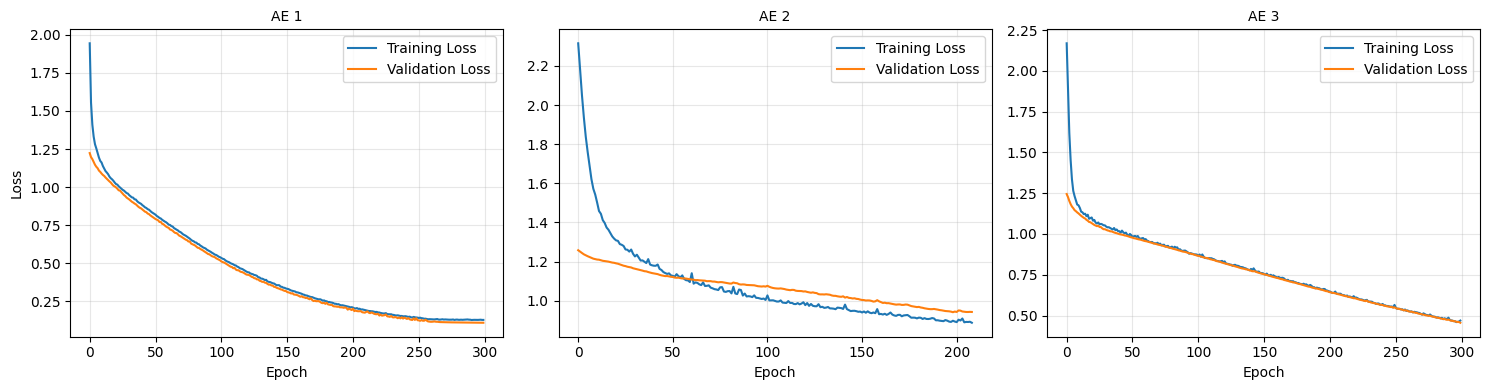

Limb: 3 Subject: 11 Youden Index: 0.1156888595912986 Sensitivity: 0.8048780487804879 Specificity: 0.3108108108108108
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x111a4dc40>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x111a4dca0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x17b47c550>, 'optimizer': 'nadam'} with score: 0.224


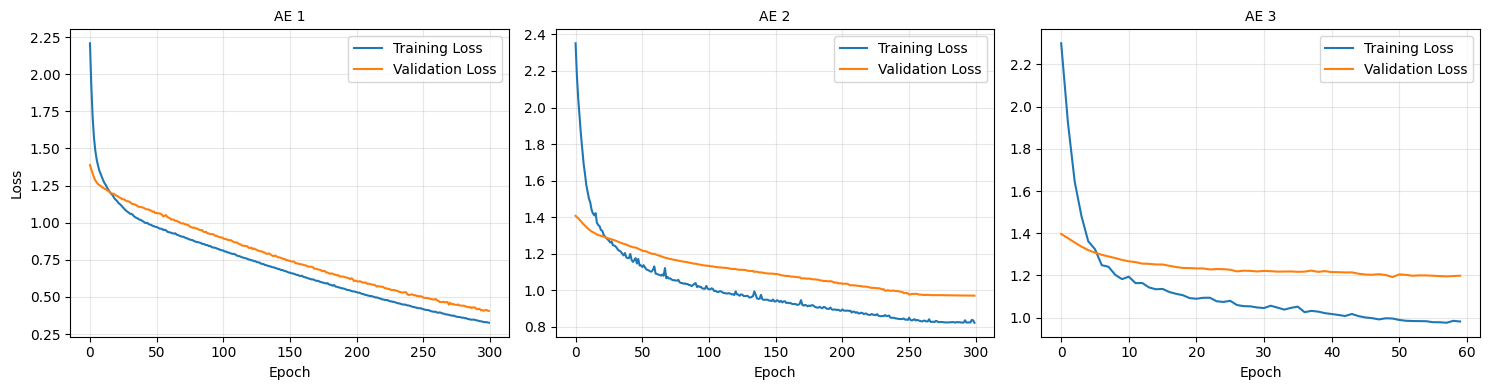

Limb: 3 Subject: 12 Youden Index: 0.027027027027026973 Sensitivity: 1.0 Specificity: 0.02702702702702703
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x111a4dc40>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x111a4dca0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x17b47c550>, 'optimizer': 'nadam'} with score: 0.196


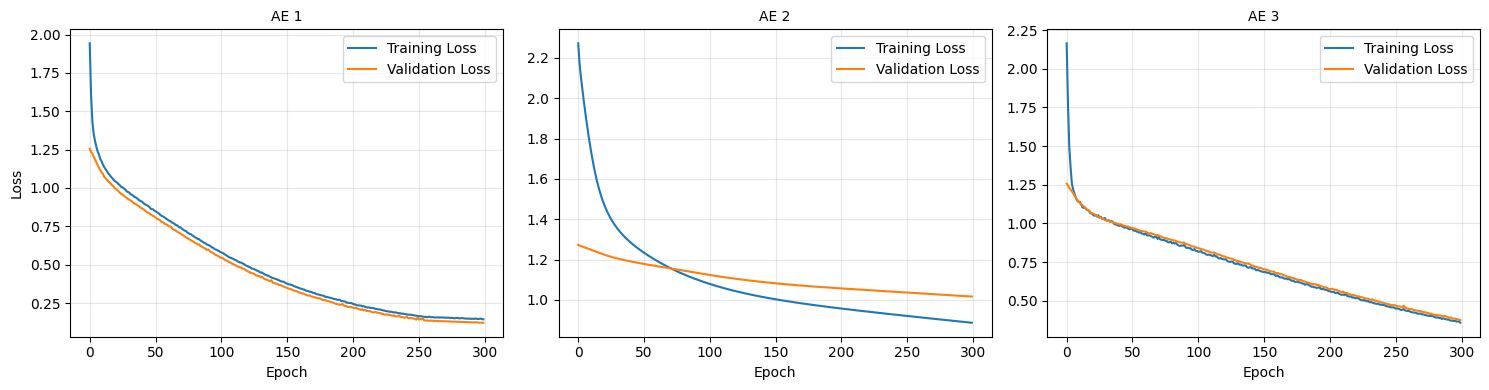

Limb: 3 Subject: 13 Youden Index: 0.06779661016949157 Sensitivity: 1.0 Specificity: 0.06779661016949153
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x111a4dc40>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x111a4dca0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x17b47c550>, 'optimizer': 'nadam'} with score: 0.216


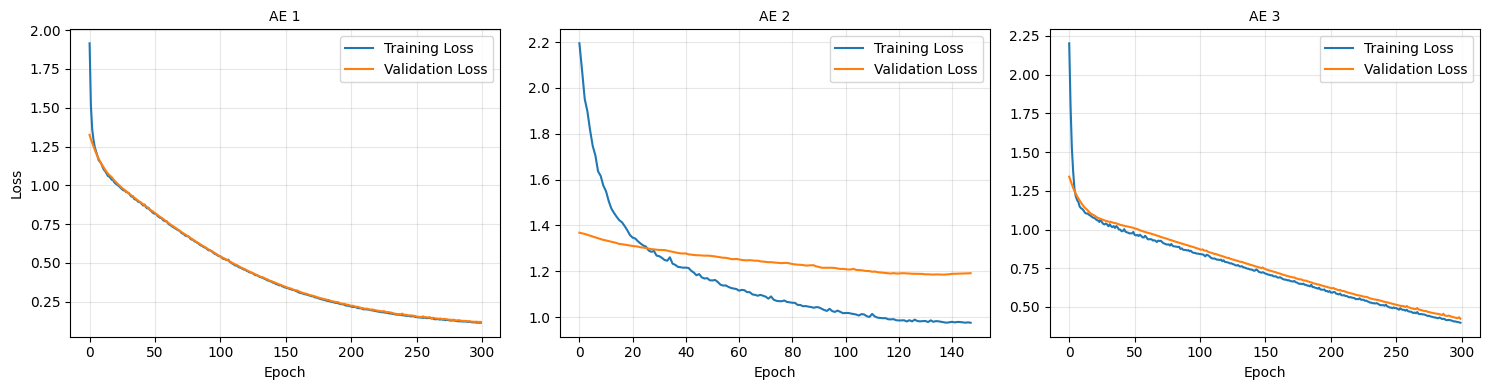

Limb: 3 Subject: 14 Youden Index: 0.32591843613077187 Sensitivity: 0.8840579710144928 Specificity: 0.4418604651162791
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x111a4dc40>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x111a4dca0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x17b47c550>, 'optimizer': 'nadam'} with score: 0.088


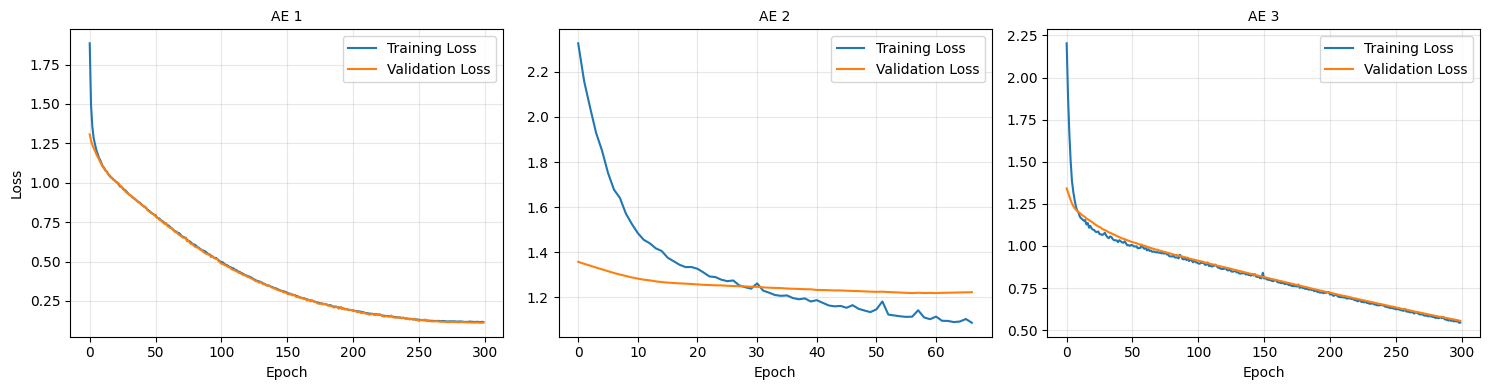

Limb: 3 Subject: 15 Youden Index: 0.5631067961165048 Sensitivity: 1.0 Specificity: 0.5631067961165048
0.21990754580701877 0.20011306809007828


In [2]:
approach = 3
filename = f'../results/approach3b/limb_nested_cv_affected.csv'

window_size = 100
epochs = 300
batch_size = 32

class_loss = False
plot_hist = False

error_func = 'mae'

X = affected[['ax', 'ay', 'az']]
y = affected['gnd']
subjects = affected['subject']
limbs = affected['limb']
usetypes = affected['use_type_encoded']

hp = {
    'activation': ['tanh'],
    'kernel_init': [tf.keras.initializers.GlorotNormal(seed=42), ],           
    'bias_init': [tf.keras.initializers.Zeros()],
    'optimizer': ['nadam'],
    'loss': [tf.keras.losses.mean_squared_error, ],     
    'learning_rate': [0.0001],
    'batch_norm': [True, False]
    }

results_3b = run_nested_cv_3b(window_size,             
                              X=X,                         
                              y=y,                        
                              subjects=subjects,           
                              limbs=limbs,   
                              usetypes=usetypes,                  
                              architecture=architecture,   
                              hp_grid=hp,
                              epochs=epochs,                  
                              batch_size=batch_size,              
                              class_loss=False,           
                              plot_hist=True,            
                              error_func='None')

print(np.mean(results_3b['youden_index']), np.std(results_3b['youden_index']))